# **AI-Powered Synthetic Medical Data Generation for Privacy Preserving Research**

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [7]:
column_names = [
'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

In [8]:
# Load the dataframe with the correct header
df = pd.read_csv('/content/Heart_disease_cleveland_5000.csv', names=column_names, header=0)

In [9]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,41,1,2,112,250,0,0,179,0,0.0,0,0,1,0
4996,45,1,1,128,308,0,2,170,0,0.0,0,0,1,0
4997,60,0,2,102,318,0,0,160,0,0.0,0,1,1,0
4998,52,1,0,152,298,1,0,178,0,1.2,1,0,3,0


In [10]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   0       145   233    1        2      150      0      2.3      2   
1   67    1   3       160   286    0        2      108      1      1.5      1   
2   67    1   3       120   229    0        2      129      1      2.6      1   
3   37    1   2       130   250    0        0      187      0      3.5      2   
4   41    0   1       130   204    0        2      172      0      1.4      0   

   ca  thal  target  
0   0     2       0  
1   3     1       1  
2   2     3       1  
3   0     1       0  
4   0     1       0  


In [11]:
X = df.drop('target', axis=1)
y = df['target']

In [12]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Data preprocessed successfully.")

Data preprocessed successfully.


In [13]:
import tensorflow as tf
from tensorflow.keras import layers
latent_dim = 100
def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(128, activation='relu', input_dim=latent_dim),
        layers.BatchNormalization(),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(X_scaled.shape[1], activation='tanh')
    ])
    return model

In [14]:
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Dense(512, activation='relu', input_dim=X_scaled.shape[1]),
        layers.Dropout(0.4),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Output real/fake prediction
    ])
    return model

In [15]:
def build_gan(generator, discriminator):
    discriminator.trainable = False  # We freeze the discriminator when training the GAN
    model = tf.keras.Sequential([generator, discriminator])
    return model

In [16]:
generator = build_generator()
discriminator = build_discriminator()
gan = build_gan(generator, discriminator)
# Compile the models
discriminator.compile(loss='binary_crossentropy', optimizer='adam',
metrics=['accuracy'])
gan.compile(loss='binary_crossentropy', optimizer='adam')
print("GAN models compiled successfully.")

GAN models compiled successfully.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Epoch 0 | D Loss: 0.7555549740791321 | G Loss: 0.6767178177833557
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━

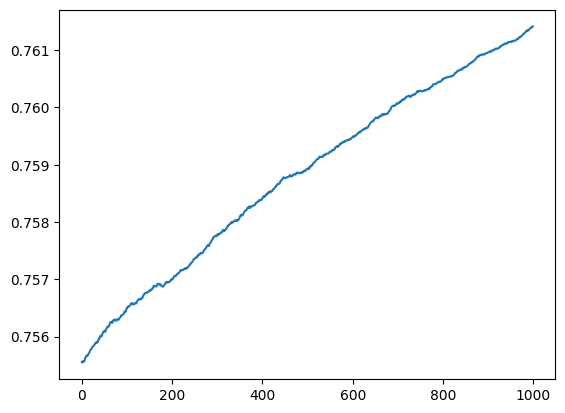

In [26]:
def train_gan(generator, discriminator, gan, X_train, epochs=100, batch_size=64):
    half_batch = batch_size // 2
    d_loss_history = [] # Initialize an empty list to store d_loss for each epoch
    for epoch in range(epochs):
        # Generate fake data
        noise = np.random.normal(0, 1, (half_batch, latent_dim))
        generated_data = generator.predict(noise)

        # Real data
        real_data = X_train[np.random.randint(0, X_train.shape[0], half_batch)]

        # Combine real and fake data
        combined_data = np.concatenate([real_data, generated_data])

        # Labels for real and fake data
        labels_real = np.ones((half_batch, 1))
        labels_fake = np.zeros((half_batch, 1))
        labels_combined = np.concatenate([labels_real, labels_fake])

        # Train the discriminator
        d_loss = discriminator.train_on_batch(combined_data, labels_combined)
        d_loss_history.append(d_loss[0])  # Append the d_loss value to the history

        # Train the generator (via the GAN model)
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        labels_gan = np.ones((batch_size, 1))
        g_loss = gan.train_on_batch(noise, labels_gan)

        # Print progress
        if epoch % 1000 == 0:
            print(f"Epoch {epoch} | D Loss: {d_loss[0]} | G Loss: {g_loss}")

    # Return d_loss_history to make it accessible outside the function
    return d_loss_history

# Start training and capture the returned d_loss_history
d_loss_history = train_gan(generator, discriminator, gan, X_scaled, epochs=1000)

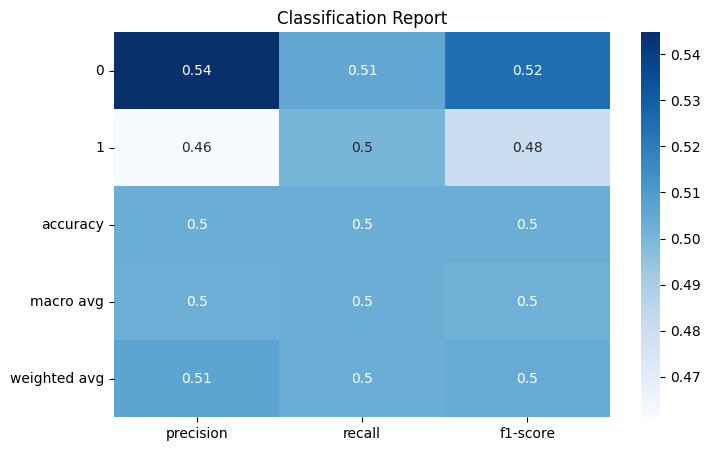

In [29]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
y_true = y
y_pred = np.random.randint(0, 2, size=len(y_true))

report = classification_report(y_true, y_pred, output_dict=True)

plt.figure(figsize=(8, 5))
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="Blues")
plt.title("Classification Report")
plt.show()


# **Synthetic Data Generation**

In [22]:
def generate_synthetic_data(generator, num_samples=303):
    noise = np.random.normal(0, 1, (num_samples, latent_dim))
    synthetic_data = generator.predict(noise)
    return synthetic_data
synthetic_data = generate_synthetic_data(generator, num_samples=303)
# Rescale the synthetic data
synthetic_data_rescaled = scaler.inverse_transform(synthetic_data)
# Create a DataFrame for the synthetic data
synthetic_df = pd.DataFrame(synthetic_data_rescaled, columns=X.columns)
print(synthetic_df.head())
# Optionally, save the synthetic data to a CSV file
synthetic_df.to_csv('synthetic_heart_disease_data.csv', index=False)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
         age       sex        cp    trestbps        chol       fbs   restecg  \
0  47.814468  0.375490  3.115373  149.208191  298.296600 -0.206594  0.010151   
1  50.624763  0.566702  3.115054  149.154739  298.135101 -0.205412  0.033852   
2  53.874294  0.381298  3.114325  149.206696  298.261444 -0.206885  0.015811   
3  48.253231  0.386007  3.115620  149.220581  298.290375 -0.206818  0.008922   
4  48.857632  0.436319  3.107039  149.223602  298.260620 -0.206331  0.007384   

      thalach     exang   oldpeak     slope        ca      thal  
0  172.462067 -0.142114  1.221541  1.138464  1.579645  1.580598  
1  172.455673 -0.141798  1.533998  1.055198  1.558855  1.513457  
2  172.459656 -0.142278  0.615623  1.090408  1.589510  1.479733  
3  172.469498 -0.142280  0.425532  1.140756  1.591523  1.376210  
4  172.451233 -0.141775  0.309141  1.144799  1.579199  1.771384  


# **Privacy Preserving**

In [23]:
def add_noise_to_data(data, noise_level=0.1):
    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise
# Add noise to the synthetic data
synthetic_data_with_noise = add_noise_to_data(synthetic_df)
print(synthetic_data_with_noise.head())

         age       sex        cp    trestbps        chol       fbs   restecg  \
0  47.914666  0.261544  3.182459  149.238278  298.254727 -0.366586  0.150393   
1  50.699758  0.715063  3.064507  149.081679  298.322898 -0.169186  0.078640   
2  54.001901  0.420646  3.167980  149.073803  298.403790 -0.044445  0.292520   
3  48.346637  0.256654  3.093795  149.079311  298.322550 -0.224588 -0.040044   
4  48.903882  0.320015  3.074211  149.357051  298.353444 -0.307635 -0.161111   

      thalach     exang   oldpeak     slope        ca      thal  
0  172.517334 -0.047650  1.249141  1.113058  1.568303  1.698690  
1  172.319297 -0.136805  1.485104  0.898477  1.539938  1.530929  
2  172.434262 -0.171692  0.773547  1.247250  1.637870  1.401392  
3  172.508605 -0.299105  0.423052  0.926634  1.463876  1.355525  
4  172.509108 -0.060734  0.328981  1.343409  1.427876  1.861315  


In [24]:
# Compare statistical properties between real and synthetic data
print("Real data statistics:")
print(X_scaled.mean(axis=0), X_scaled.std(axis=0))
print("Synthetic data statistics:")
print(synthetic_df.mean(axis=0), synthetic_df.std(axis=0))

Real data statistics:
[ 4.20996571e-17 -6.69686528e-17  7.60280727e-17  3.12994075e-16
  2.71604961e-16  1.86517468e-17  1.70530257e-17 -5.73763259e-17
 -1.10489395e-16  1.95399252e-17 -5.00932629e-17 -1.79412041e-17
  6.51922960e-17] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Synthetic data statistics:
age          47.600330
sex           0.385793
cp            3.111259
trestbps    149.209595
chol        298.202576
fbs          -0.206519
restecg       0.016282
thalach     172.457031
exang        -0.141287
oldpeak       0.473976
slope         1.080240
ca            1.588707
thal          1.658051
dtype: float32 age         3.326791
sex         0.116648
cp          0.024817
trestbps    0.052362
chol        0.411011
fbs         0.001071
restecg     0.032812
thalach     0.031466
exang       0.003442
oldpeak     0.465279
slope       0.176603
ca          0.006758
thal        0.424020
dtype: float32
